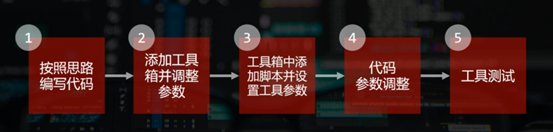

#### 1.将代码粘贴到pycharm

#### 2.添加工具箱并调整参数
 2.1创建工具箱

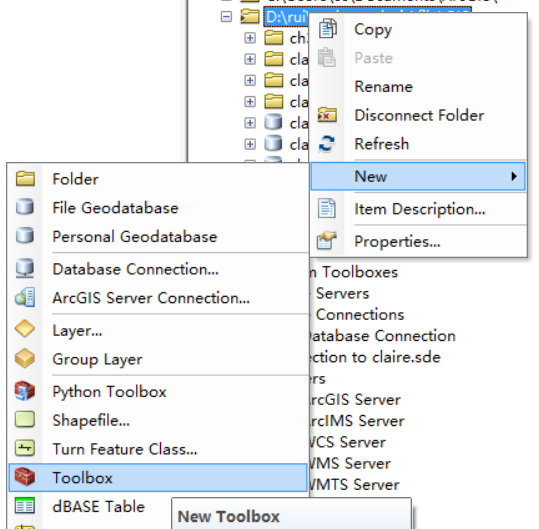

#### 2.2设置别名

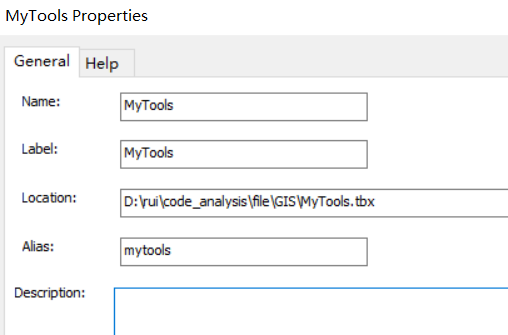

#### 3.工具箱添加脚本并设置参数
3.1添加脚本

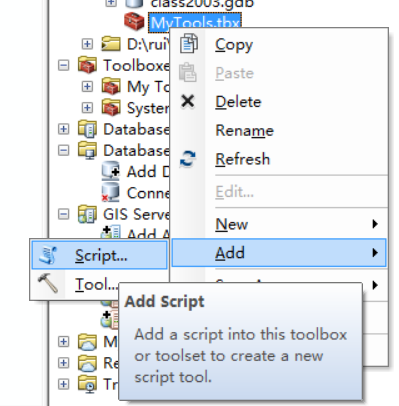

3.2设置名称

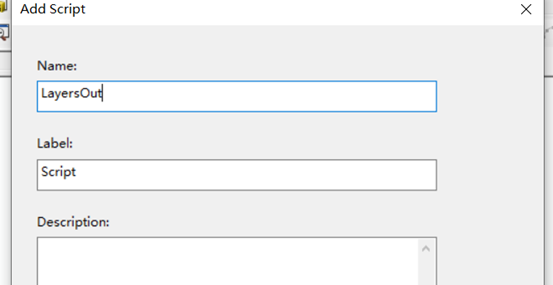

3.3添加脚本

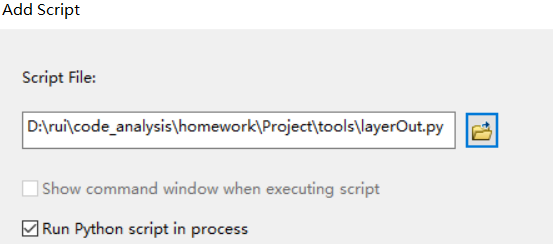

3.4设置参数及参数默认值

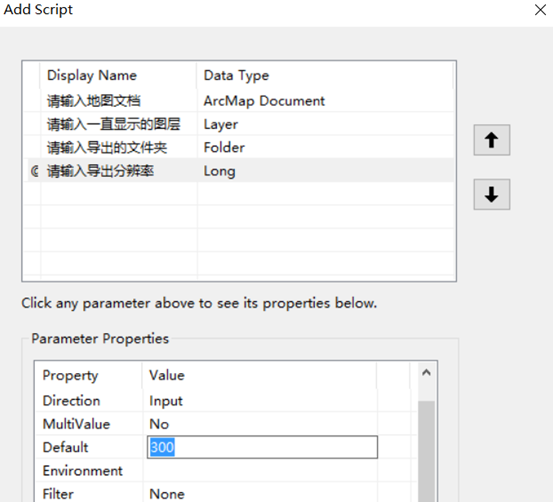

多个图层选yes

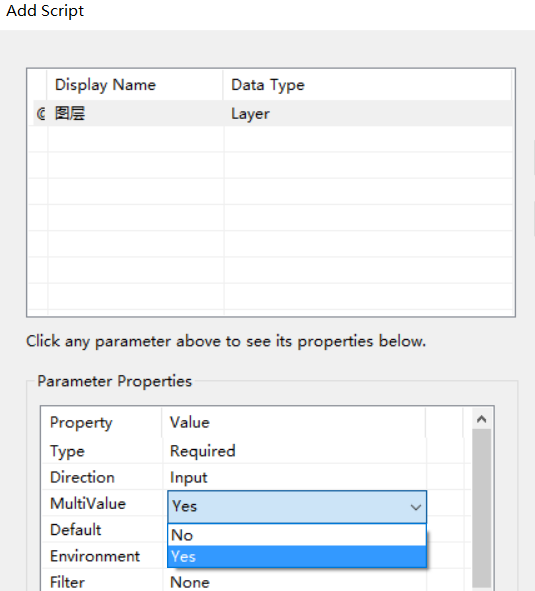

#### 4.代码参数调整
>4.1所有参数都是通过arcpy.GetParameterAsText(0),代替，<b>注意顺序</b><br>
4.2<b>中文注释和代码空一行</b>，否则报错<br>
4.3在脚本中用arcpy.AddMessage()代替print()输出，详细见官网：<br>
https://desktop.arcgis.com/zh-cn/arcmap/10.3/analyze/creating-tools/setting-script-tool-parameters.htm

```
# -*- coding: utf-8 -*-
import arcpy
import os

##########################################################
#设置目标mxd对象路径

mxd_path = arcpy.GetParameterAsText(0)
# mxd_path = r'D:\rui\code_analysis\file\GIS\class2101\MD.mxd'

#设置导出目录

lyronlist = arcpy.GetParameterAsText(1)

# lyronlist = ['XZQ_town','XZQ_vill_dt']

#常开图层列表

output_path = arcpy.GetParameterAsText(2)

# output_path = r'D:\rui\code_analysis\file\GIS\class2101\jpg'

#设置分辨率

resolution = arcpy.GetParameterAsText(3)
# resolution = 300

##########################################################
#实例化一个mxd对象

mxd = arcpy.mapping.MapDocument(mxd_path)

#将所有图层列出

lyrlist = arcpy.mapping.ListLayers(mxd)

#将所有图层名列出

lyrnlist = [i.name for i in arcpy.mapping.ListLayers(mxd)]

####################test#############################


#for循环每个需要打印的图层

for plyr in [ i for i in lyrnlist if i not in lyronlist]:

    #设置一个变量，容纳打开的图层对象

    layon = ''

    #for循环所有图层，打开需要打开的图层

    for lyr in lyrlist:
        if lyr.name in lyronlist:
            lyr.visible =  True
        elif lyr.name == plyr:
            lyr.visible = True
            layon = lyr
        else:
            lyr.visible = False

    #如果需要打印的图层已经打开，导出图片

    if layon.visible:
        arcpy.mapping.ExportToJPEG(mxd,
                              os.path.join(output_path,'{}.jpg'.format(plyr)),
                              resolution = resolution)
        arcpy.AddMessage('{} done!'.format(plyr))

#记得删除mxd实例

del mxd
arcpy.AddMessage('All layers done!')
```

#### 5.工具测试

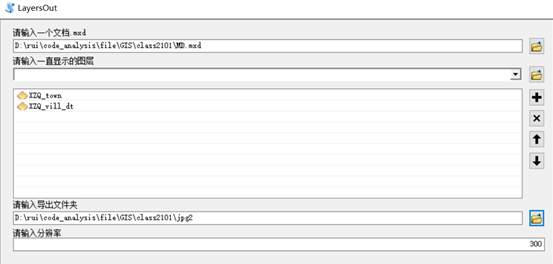

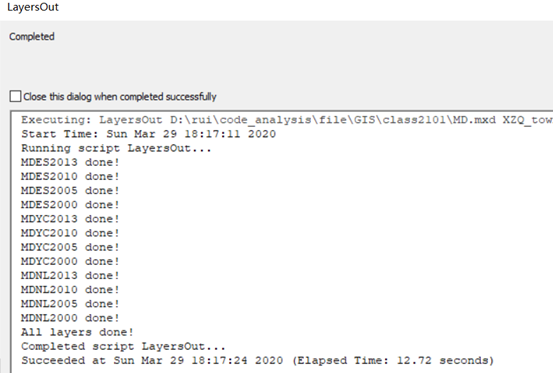